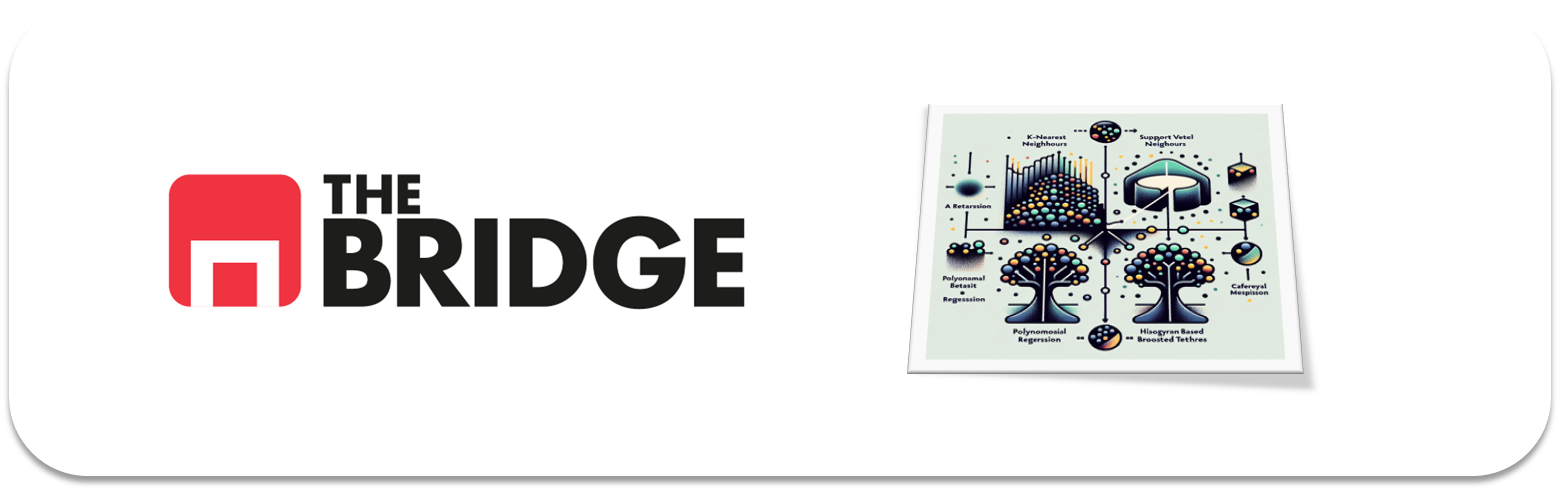

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La pr√°ctica obligatoria de esta unidad consiste en resolver un modelado de clasificaci√≥n, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendr√°s que descar los directorios de im√°genes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesi√≥n en vivo para que punt√∫e adecuadamente.  
* Recuerda tambi√©n que no es necesario que est√© perfecta, s√≥lo es necesario que se vea el esfuerzo. 
* Esta pr√°ctica se resolver√° en la sesi√≥n en vivo correspondiente y la soluci√≥n se publicar√° en el repo del curso. 

### Ejercicio 0

Importa los paquetes y m√≥dulos que necesites a lo largo del notebook.

In [205]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb



%matplotlib inline 
plt.rcParams['figure.figsize'] = (16, 9) 
plt.style.use('ggplot') 
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, make_scorer, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from bootcampviztools import pinta_distribucion_categoricas
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression


### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificaci√≥n binaria con regresi√≥n log√≠stica, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos pr√≥ximos a√±os. El dataset de partida lo puedes en contrar en el directorio data que acompa√±a al ejercicio. 

### #1.1
C√°rgalo y, apoy√°ndote en las herramientas y fuentes que consideres necesarias, haz una descripci√≥n textual de sus variables. Luego con ayuda de los datos, haz una clasificaci√≥n inicial de sus variables en categ√≥ricas y num√©ricas.

In [161]:
df = pd.read_csv(r"data/credit_npo.csv")
df.head(10)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                 0                              0.081892   37   
1                 0                              0.023413   74   
2                 0                              0.000000   43   
3                 0                              0.492754   44   
4                 0                              1.000000   63   
5                 0                              0.101002   61   
6                 0                              0.222830   60   
7                 0                              0.353443   39   
8                 0                              0.772455   45   
9                 0                              0.116165   44   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     0   0.070709         5656.0   
1                                     0   0.209197         4870.0   
2                                     0   0.080784         5000.0   
3                                     0   0.412735         7333.0   
4                                     0   0.000000         8333.0   
5                                     0   0.217115        15880.0   
6                                     0   0.907083         1312.0   
7                                     0   0.764309         4000.0   
8                                     0   0.387179         5100.0   
9                                     0   0.160236        10833.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               12                        1   
1                                9                        0   
2                                2                        0   
3                                4                        0   
4                                3                        0   
5                                5                        0   
6                                5                        0   
7                               11                        0   
8                                5                        0   
9                                8                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             0                                     0   
1                             1                                     0   
2                             0                                     0   
3                             2                                     0   
4                             0                                     0   
5                             1                                     0   
6                             0                                     0   
7                             1                                     0   
8                             1                                     0   
9                             1                                     0   

   NumberOfDependents  
0                 0.0  
1                 0.0  
2                 2.0  
3                 3.0  
4                 1.0  
5                 0.0  
6                 0.0  
7                 2.0  
8                 3.0  
9                 0.0

- SeriousDlqin2yrs: Variable binaria que indica si una persona ha tenido un impago grave en los √∫ltimos dos a√±os.
- RevolvingUtilizationOfUnsecuredLines: Ratio de utilizaci√≥n de l√≠neas de cr√©dito no aseguradas.
- age: Edad.
- NumberOfTime30-59DaysPastDueNotWorse: N√∫mero de veces que el individuo ha estado entre 30 y 59 d√≠as atrasado en el pago sin que haya sido peor.
- DebtRatio: Ratio de deuda.
- MonthlyIncome: Ingreso mensual.
- NumberOfOpenCreditLinesAndLoans: N√∫mero total de l√≠neas de cr√©dito y pr√©stamos abiertos.
- NumberOfTimes90DaysLate: N√∫mero de veces que el individuo ha estado 90 d√≠as o m√°s atrasado en el pago.
- NumberRealEstateLoansOrLines: N√∫mero de pr√©stamos o l√≠neas de cr√©dito.
- NumberOfTime60-89DaysPastDueNotWorse: N√∫mero de veces que el individuo ha estado entre 60 y 89 d√≠as atrasado en el pago sin que haya sido peor.
- NumberOfDependents: N√∫mero de dependientes.


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

En general no tenemos nulos en ninguna feature exceptuando en MonthlyIncome que parece importante saber cu√°nto gana al mes el individuo, y exceptuando NumberOfDependents que tambi√©n parece interesante saber si tiene personas a cargo para un buen resultado del modelado. Por otro lado son todos int y float lo cual nos va a ayudar mucho porque no tendremos que convertirlos sino manipular correctamente las features que nos interesan.

In [163]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variaci√≥n cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variaci√≥n de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposici√≥n anterior para que tengan m√°s sentido, y uso asignaci√≥n en vez de inplace = True (esto es arbitrario para el tama√±o de este dataset)

    # Correcci√≥n para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerencia de tipo de variable, empiezo considerando todas categ√≥ricas pero podr√≠a haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [164]:
# Aplicar la funci√≥n card_tipo al dataset df
resultado_card_tipo = card_tipo(df)

# Mostrar el resultado
print(resultado_card_tipo)


                                       Card     %_Card     Tipo  \
SeriousDlqin2yrs                          2   0.015953    int64   
RevolvingUtilizationOfUnsecuredLines  10764  85.857861  float64   
age                                      78   0.622158    int64   
NumberOfTime30-59DaysPastDueNotWorse     10   0.079764    int64   
DebtRatio                             11547  92.103374  float64   
MonthlyIncome                          4167  33.237617  float64   
NumberOfOpenCreditLinesAndLoans          43   0.342985    int64   
NumberOfTimes90DaysLate                  13   0.103693    int64   
NumberRealEstateLoansOrLines             16   0.127622    int64   
NumberOfTime60-89DaysPastDueNotWorse      8   0.063811    int64   
NumberOfDependents                       10   0.079764  float64   

                                          tipo_sugerido  
SeriousDlqin2yrs                                Binaria  
RevolvingUtilizationOfUnsecuredLines  Numerica continua  
age                  

### #1.2
¬øQu√© tipo de problema estamos tratando? ¬øCu√°l es la variable target?

Siendo el target una binaria tenemos claramente un problema de clasificaci√≥n. O tiene problemas en dos a√±os o no los tiene.

### #1.3
Pinta la distribuci√≥n de frecuencias del target y com√©ntala

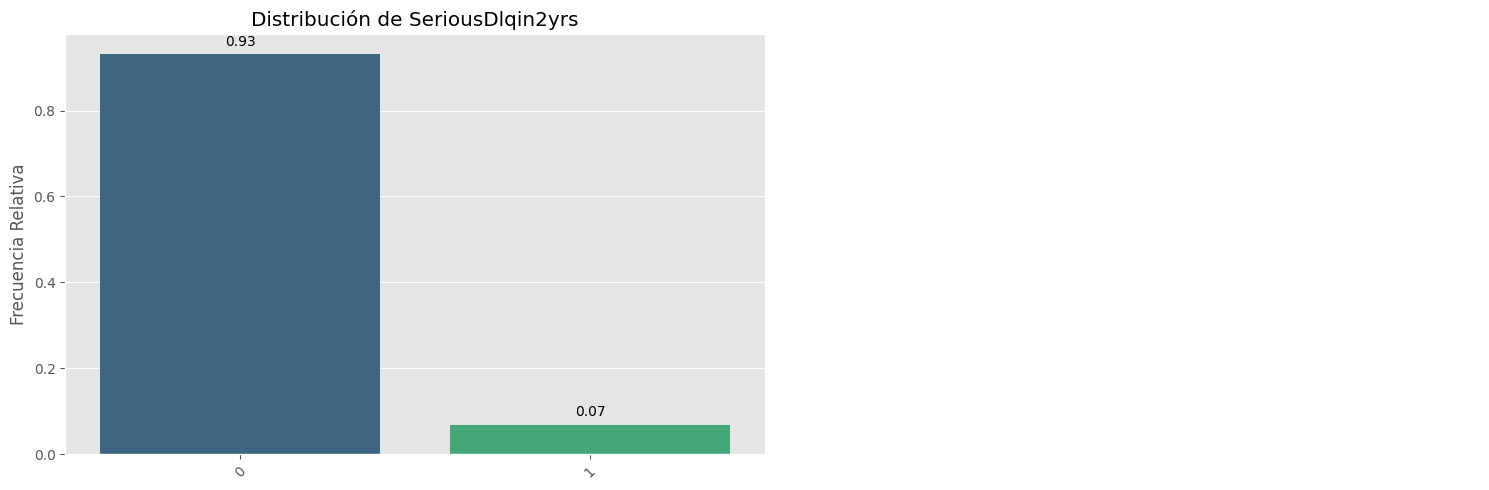

In [165]:
pinta_distribucion_categoricas(df, ["SeriousDlqin2yrs"], relativa=True, mostrar_valores=True)

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las t√©cnicas que creas necesarias para obtener el mejor resultado (suponiendo que este despu√©s de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validaci√≥n cruzada antes de optimizaci√≥n y luego ajusta los hiperpar√°metros del mejor modelo. Eval√∫a este y haz un peque√±o an√°lisis de errores.

In [166]:
# Split en train y test

# Separar variables predictoras y target
X = df.drop(columns=["SeriousDlqin2yrs"])  # Variables independientes
y = df["SeriousDlqin2yrs"]  # Variable objetivo

# Hacer el split en train y test (80%-20%)
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

# Mostrar tama√±os de los conjuntos
print(f"Tama√±o de train_set: {train_set.shape}")
print(f"Tama√±o de test_set: {test_set.shape}")


Tama√±o de train_set: (10029, 11)
Tama√±o de test_set: (2508, 11)


In [167]:
#Muestro la distribuci√≥n de las variables num√©ricas
features_num = ["RevolvingUtilizationOfUnsecuredLines", "age", "NumberOfTime30-59DaysPastDueNotWorse",
    "DebtRatio", "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans",
    "NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines", "NumberOfDependents"
]

In [168]:
train_set[features_num].describe()

RevolvingUtilizationOfUnsecuredLines           age  \
count                          10029.000000  10029.000000   
mean                               0.332534     52.006681   
std                                0.368161     15.064668   
min                                0.000000     21.000000   
25%                                0.030773     41.000000   
50%                                0.164421     51.000000   
75%                                0.588571     62.000000   
max                                5.347652    101.000000   

       NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  MonthlyIncome  \
count                           10029.00000  10029.000000    9458.000000   
mean                                0.40014      1.859805    6899.357158   
std                                 3.96043      9.053464   12785.807976   
min                                 0.00000      0.000000       0.000000   
25%                                 0.00000      0.142648    3481.000000   
50%                                 0.00000      0.301520    5415.500000   
75%                                 0.00000      0.506312    8290.750000   
max                                98.00000     99.000000  702500.000000   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                     10029.000000             10029.000000   
mean                          8.480905                 0.250972   
std                           5.150639                 3.940818   
min                           0.000000                 0.000000   
25%                           5.000000                 0.000000   
50%                           8.000000                 0.000000   
75%                          11.000000                 0.000000   
max                          49.000000                98.000000   

       NumberRealEstateLoansOrLines  NumberOfDependents  
count                  10029.000000         9889.000000  
mean                       0.997408            0.819395  
std                        1.145652            1.134976  
min                        0.000000            0.000000  
25%                        0.000000            0.000000  
50%                        1.000000            0.000000  
75%                        2.000000            1.000000  
max                       19.000000           10.000000

Vemos que age tiene un rango muy amplio de entre 21 y 101 a√±os. El ratio de decuda var√≠a hasta 99 lo que me hace pensar que habr√° outliers. El ingreso mensual tiene una distribuci√≥n hasta los 702500 lo que me hace pensar que pueda necesitar transformaci√≥n o tratamiento de outliers va de 0 a 5 lo que puede ser que tambi√©n tenga outliers.

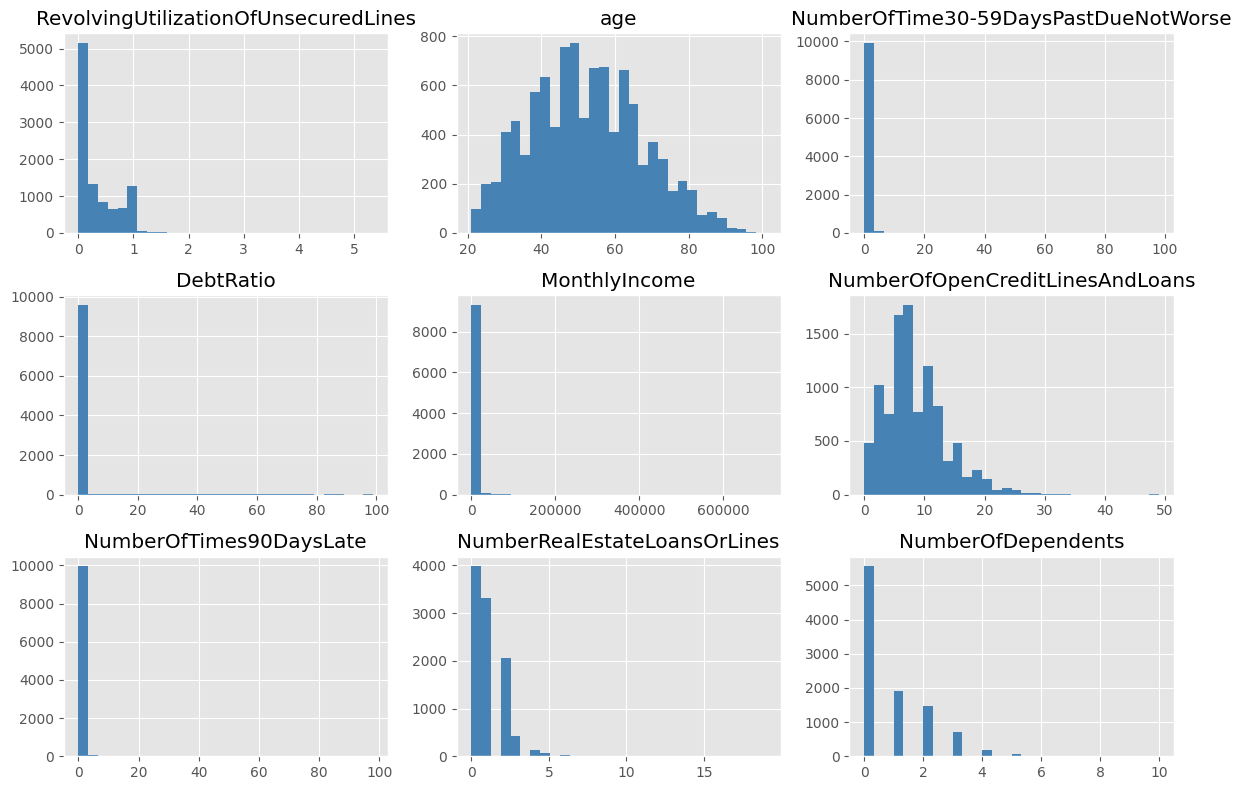

In [169]:
# Crear una figura con m√∫ltiples subgr√°ficos
train_set[features_num].hist(figsize=(12, 8), bins = 30, color="steelblue")  
plt.tight_layout()
plt.show()

RevolvingUtilizationOfUnsecuredLines: Alta concentraci√≥n en valores bajos, la mayor√≠a cerca de 0. Baja utilizaci√≥n en l√≠neas de cr√©dito de la mayor√≠a de las personas. Baja utilizaci√≥n de l√≠neas de cr√©dito = estabilidad financiera.
age: bastante normal. Yo no la tocar√≠a.
NumberOfTime30-59DaysPastDueNotWorse: En general no hay retrasos en los pagos. Algunos aislados superan los 50 pero es un valor muy raro y puede ser un outlier perfectamente.
DebtRatio: Tambi√©n alta concentraci√≥n en valores bajos. Existe alg√∫n valor que alcanza 99 que tambi√©n puede ser un outlier.
MonthlyIncome: La mayor√≠a tienen ingresos relativamente bajos. Aunque ese "bajos" son casi 7000 d√≥lares de media, lo que pasa es que est√° considerando el m√°ximo que es muy muy alto y puede ser outlier. Considerando que el percentil 75% est√° en 8000, tiene toda la pinta de ser un outlier.
NumberOfOpenCreditLinesAndLoans: Distribuci√≥n hacia valores bajos. La amyor√≠a de las personas tienen menos de 15 d√≠as de cr√©dito, casi todas menores de 10. M√°s de 30 d√≠as de cr√©dito se puede considerar at√≠pico.
NumberOfTimes90DaysLate: Casi ninguno han estado en mora grave. Se observan algunos que superan los 50 pero puede ser un valor extremo. Esos son los que tendr√≠an un riesgo financiero significativo.
NumberRealEstateLoansOrLines: La mayor√≠a tienen 0 o 1 pr√©stamos y algunos m√°s de 5.
NumberOfDependents: La mayor√≠a tiene 0 o 1 personas a cargo. Algunos hasta 10.

Muy bien pero KNN no maneja valores NaN.  
MontlyIncome. Divido las edades entre 21 y 40, 40 y 65 y de 65 en adelante. Calculo la media de ingresos y la asigno a los que tengan valores nulos seg√∫n el rango de edad en el que est√©n:

In [170]:
# Mostrar 20 registros con edad y la asignaci√≥n de grupo para analizar el problema
train_set["AgeGroup"] = pd.cut(train_set["age"], bins=[20, 40, 65, 101], labels=["21-40", "40-65", "65+"], include_lowest=True)
test_set["AgeGroup"] = pd.cut(test_set["age"], bins=[20, 40, 65, 101], labels=["21-40", "40-65", "65+"], include_lowest=True)

print(train_set[["age", "AgeGroup"]].head(20))
print(test_set[["age", "AgeGroup"]].head(20))

       age AgeGroup
5441    51    40-65
3948    73      65+
8819    28    21-40
315     40    21-40
10746   61    40-65
5199    51    40-65
7135    22    21-40
9782    56    40-65
7076    40    21-40
1624    78      65+
6733    65    40-65
8478    48    40-65
6756    32    21-40
4429    73      65+
11895   65    40-65
3366    38    21-40
4352    84      65+
1071    47    40-65
2742    68      65+
9279    44    40-65
       age AgeGroup
9525    69      65+
2984    38    21-40
6247    29    21-40
9931    56    40-65
7354    59    40-65
429     60    40-65
3160    50    40-65
2236    36    21-40
9178    44    40-65
4111    50    40-65
11166   53    40-65
5859    56    40-65
3355    48    40-65
1351    43    40-65
4115    60    40-65
2452    69      65+
8952    56    40-65
4833    47    40-65
2534    54    40-65
4874    24    21-40


In [171]:
# Calcular la media de MonthlyIncome por grupo de edad en train sin el warning
income_means = train_set.groupby("AgeGroup", observed=True)["MonthlyIncome"].mean()

# Verificar si hay valores obtenidos
print(income_means)

AgeGroup
21-40    5079.996639
40-65    7789.552448
65+      6590.815085
Name: MonthlyIncome, dtype: float64


In [172]:
# Imputar valores faltantes en train y test
for group in income_means.index:  # Acceder correctamente usando el √≠ndice real
    train_set.loc[train_set["MonthlyIncome"].isna() & (train_set["AgeGroup"] == group), "MonthlyIncome"] = income_means.loc[group]
    test_set.loc[test_set["MonthlyIncome"].isna() & (test_set["AgeGroup"] == group), "MonthlyIncome"] = income_means.loc[group]

# Verificar si quedan valores nulos despu√©s de la imputaci√≥n
print("Nulos en train despu√©s de la imputaci√≥n:", train_set["MonthlyIncome"].isna().sum())
print("Nulos en test despu√©s de la imputaci√≥n:", test_set["MonthlyIncome"].isna().sum())

Nulos en train despu√©s de la imputaci√≥n: 0
Nulos en test despu√©s de la imputaci√≥n: 0


Ahora NumberOfDependants que va a ir con la moda.

In [173]:
# Calcular la moda de NumberOfDependents
mode_dependents = train_set["NumberOfDependents"].mode()[0]  # Extraer el valor m√°s frecuente

# Imputar la moda en los valores nulos
train_set["NumberOfDependents"] = train_set["NumberOfDependents"].fillna(mode_dependents)
test_set["NumberOfDependents"] = test_set["NumberOfDependents"].fillna(mode_dependents)

# Verificar si quedan valores nulos despu√©s de la imputaci√≥n
print("Nulos en train despu√©s de la imputaci√≥n:", train_set["NumberOfDependents"].isna().sum())
print("Nulos en test despu√©s de la imputaci√≥n:", test_set["NumberOfDependents"].isna().sum())

Nulos en train despu√©s de la imputaci√≥n: 0
Nulos en test despu√©s de la imputaci√≥n: 0


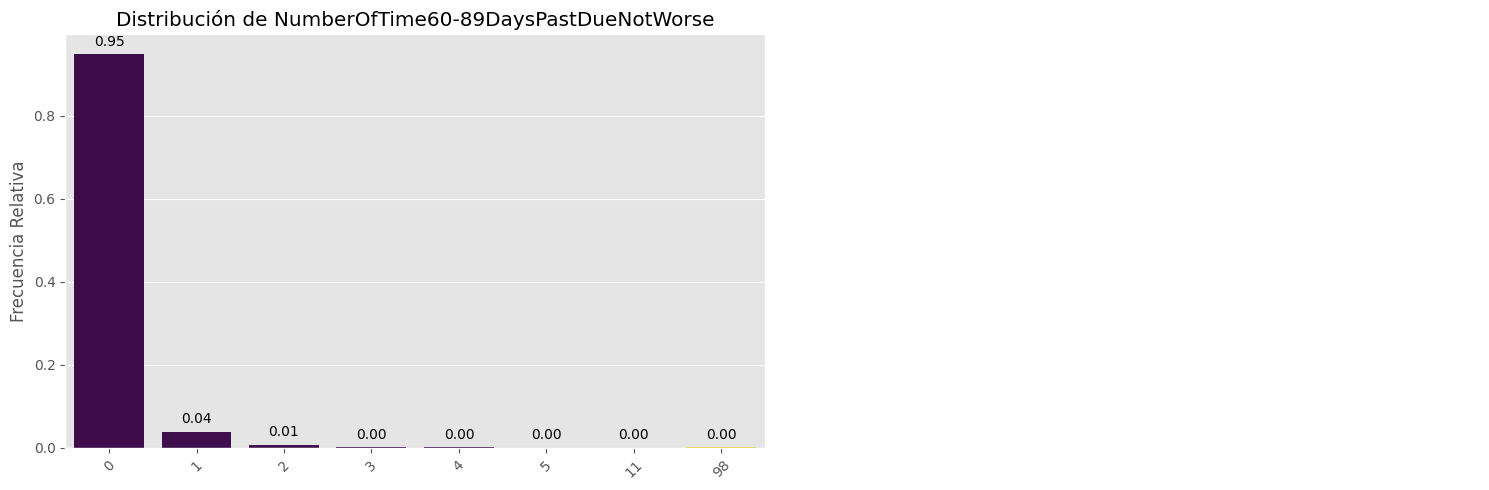

In [174]:
features_cat = ["NumberOfTime60-89DaysPastDueNotWorse"]
bt.pinta_distribucion_categoricas(train_set, features_cat, relativa = True, mostrar_valores = True)

Hay much√≠simos individuos que no han estado nunca en la tesitura de deber entre 60 y 89 d√≠as. Despu√©s hay algunos que tardan un d√≠a o 2 y de tres en adelante es pr√°cticamente anecd√≥tico.
Esto lo puedo pasar a una categ√≥rica binara que me diga los que no han estado en problemas de pago de 60 a 89 d√≠as y los que s√≠. Que seguir√° desbalanceada pero ser√° m√°s f√°cil de trabajar.

In [175]:
# Transformaci√≥n en train y test
train_set["HasPastDue_60_89"] = (train_set["NumberOfTime60-89DaysPastDueNotWorse"] > 0).astype(int)
test_set["HasPastDue_60_89"] = (test_set["NumberOfTime60-89DaysPastDueNotWorse"] > 0).astype(int)

# Verificar la distribuci√≥n en ambos conjuntos
print("Distribuci√≥n en train:")
print(train_set["HasPastDue_60_89"].value_counts(normalize=True))
print("\nDistribuci√≥n en test:")
print(test_set["HasPastDue_60_89"].value_counts(normalize=True))

Distribuci√≥n en train:
HasPastDue_60_89
0    0.949347
1    0.050653
Name: proportion, dtype: float64

Distribuci√≥n en test:
HasPastDue_60_89
0    0.948963
1    0.051037
Name: proportion, dtype: float64


In [176]:
# Definir el escalador. Le hago MinMax para no tener que hacer transformaciones logar√≠tmicas.
scaler = MinMaxScaler()

# Aplicar escalado a las variables num√©ricas
train_set[features_num] = scaler.fit_transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])

# Mostrar un vistazo a los datos escalados
print(train_set[features_num].head())
print(test_set[features_num].head())

       RevolvingUtilizationOfUnsecuredLines     age  \
5441                               0.016650  0.3750   
3948                               0.003641  0.6500   
8819                               0.000000  0.0875   
315                                0.186998  0.2375   
10746                              0.076485  0.5000   

       NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
5441                               0.000000   0.007574       0.007117   
3948                               0.000000   0.878788       0.009382   
8819                               0.010204   0.000818       0.004057   
315                                0.000000   0.009662       0.008421   
10746                              0.000000   0.004323       0.023535   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
5441                          0.122449                      0.0   
3948                          0.244898                      0.0   
8819                         

In [177]:
# Definir la variable objetivo con un nombre claro
target = "SeriousDlqin2yrs"


In [178]:
# Creo los juegos de train y test:
X_train = train_set[features_cat + features_num]
y_train = train_set[target]
X_test = test_set[features_cat + features_num]
y_test = test_set[target]

In [138]:
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [179]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9328
           1       0.75      0.32      0.45       701

    accuracy                           0.95     10029
   macro avg       0.85      0.66      0.71     10029
weighted avg       0.94      0.95      0.93     10029



In [180]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2345
           1       0.35      0.14      0.20       163

    accuracy                           0.93      2508
   macro avg       0.65      0.56      0.58      2508
weighted avg       0.90      0.93      0.91      2508



El modelo tiene alta precisi√≥n en la clase 0 (no morosos) pero bajo rendimiento en la clase 1 (morosos). El modelo no me identifica bien a los morosos.  
Macro avg en train tiene una precisi√≥n de 0.82, recall de 0.6 t f1 de 0.64 y en test 0.67, 0.55 y 0.57. Hay una ligera ca√≠da de m√©tricas, corremos peligro de que el modelo est√© intentando sobreajustar. El problema principal parece estar en la detecci√≥n de la clase minoritaria. Aqu√≠ podemos ajustar el n_neighbors, podemos usar SMOTE, ajustar la m√©trica de la distancia de KNN y optimizar la selecci√≥n de features.

In [181]:
# Valores de n_neighbors a probar
neighbors_range = [3, 5, 7, 10, 15]

# Evaluar KNN con distintos valores de n_neighbors
for n in neighbors_range:
    print(f"\nüîπ Probando con n_neighbors = {n}")
    
    # Definir y entrenar el modelo
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    # Evaluaci√≥n en train
    y_train_pred = knn.predict(X_train)
    print("Train:")
    print(classification_report(y_train, y_train_pred))

    # Evaluaci√≥n en test
    y_test_pred = knn.predict(X_test)
    print("Test:")
    print(classification_report(y_test, y_test_pred))


üîπ Probando con n_neighbors = 3
Train:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9328
           1       0.75      0.32      0.45       701

    accuracy                           0.95     10029
   macro avg       0.85      0.66      0.71     10029
weighted avg       0.94      0.95      0.93     10029

Test:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2345
           1       0.35      0.14      0.20       163

    accuracy                           0.93      2508
   macro avg       0.65      0.56      0.58      2508
weighted avg       0.90      0.93      0.91      2508


üîπ Probando con n_neighbors = 5
Train:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      9328
           1       0.70      0.20      0.31       701

    accuracy                           0.94     10029
   macro avg       0.82      0.60     

| `n_neighbors` | Precision (Clase 1) | Recall (Clase 1) | F1-Score (Clase 1) |
|--------------|--------------------|------------------|------------------|
| **3**  | 0.75 (train) - 0.35 (test) | 0.32 (train) - 0.14 (test) | 0.45 (train) - 0.20 (test) |
| **5**  | 0.70 (train) - 0.40 (test) | 0.20 (train) - 0.12 (test) | 0.31 (train) - 0.18 (test) |
| **7**  | 0.66 (train) - 0.30 (test) | 0.16 (train) - 0.07 (test) | 0.25 (train) - 0.11 (test) |
| **10**  | 0.64 (train) - 0.24 (test) | 0.09 (train) - 0.03 (test) | 0.16 (train) - 0.05 (test) |
| **15**  | 0.58 (train) - 0.27 (test) | 0.09 (train) - 0.04 (test) | 0.16 (train) - 0.06 (test) |

La precisi√≥n de la clase 0 (no morosos) se mantiene para todos los valores de n_neighbors as√≠ que seguimos con la clase 1.  
La clase 1 tiene un recall bastante bajo en todos los casos para train y para test y baja seg√∫n n_neighbors aumenta.  
El modelo sobreajusta a n_neighbors bajos pues el mejor n_neighbors es 3, para este par√°metro precisi√≥n de la clase 1 en train es 0.75 y recall es 0.32 mientras que en test es 0.35 y 0.14. Esto nos dice que el modelo aprende bien en el train pero pierde capacidad de generalizaci√≥n en test.  
Voy a usar validaci√≥n cruzada para evaluar la estabilidad en diferentes subconjuntos de train.


Divido train_set en varios subconjuntos y pruebo el modelo en cada uno de ellos. Cada vez se usa como test un subconjunto diferente mientras el resto entrena el modelo. Vamos aplicar validaci√≥n cruzada cn 5 folds usando cross_val_score.

Si uso balanced accuracy caluclar√≠a el accuracy para cada clase por separado, luego, hace el promedio de ambas clases dando el mismo peso a la clase minoritaria. Es √∫til para detectar a los morosos porque evita que el modelo parezca "bueno" s√≥lo porque acierta a la clase mayoritaria. Pero, no considera la relaci√≥n entre precisi√≥n y recall. Esto lo har√≠a con F1-score macro.  
Si interesa mejorar la detecci√≥n de los morosos espec√≠ficamente, F1-score macro es m√°s informativo porque penaliza m√°s los falsos negativos. Probamos ambas a ver qu√© pasa.

In [182]:
# Lista para almacenar m√©tricas
metricas_F1 = []

# Rango de valores de k
for k in range(1, 21):
    print(f"Para k= {k}, F1-score macro medio:", end=" ")
    
    # Definir modelo con k actual
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Calcular la validaci√≥n cruzada usando F1-score macro
    f1_macro = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(f1_score, average="macro")))
    
    # Guardar m√©trica
    metricas_F1.append(f1_macro)
    
    print(f1_macro)

# Seleccionar el mejor valor de k basado en la m√©trica
best_k = np.argmax(metricas_F1) + 1
print(f"best_k para F1 {best_k}")

Para k= 1, F1-score macro medio: 0.5781558521258827
Para k= 2, F1-score macro medio: 0.5378854343434991
Para k= 3, F1-score macro medio: 0.5795452333872053
Para k= 4, F1-score macro medio: 0.536752820575874
Para k= 5, F1-score macro medio: 0.5681980049208646
Para k= 6, F1-score macro medio: 0.5389991885016372
Para k= 7, F1-score macro medio: 0.5607046119037239
Para k= 8, F1-score macro medio: 0.5434990883466521
Para k= 9, F1-score macro medio: 0.5607263028837669
Para k= 10, F1-score macro medio: 0.5408694063039684
Para k= 11, F1-score macro medio: 0.5551237743368127
Para k= 12, F1-score macro medio: 0.537815415196483
Para k= 13, F1-score macro medio: 0.5520160469118818
Para k= 14, F1-score macro medio: 0.5312716469226654
Para k= 15, F1-score macro medio: 0.5474949943998144
Para k= 16, F1-score macro medio: 0.536815916528733
Para k= 17, F1-score macro medio: 0.5529921947939644
Para k= 18, F1-score macro medio: 0.5399840627005088
Para k= 19, F1-score macro medio: 0.5530537483055916
Para 

In [183]:
metricas_balanced = []
for k in range(1,21):
    print(f"Para k_balanced= {k}, recall medio:", end = " ")
    model = KNeighborsClassifier(n_neighbors= k)
    balanced_accuracy = np.mean(cross_val_score(model,X_train,y_train, cv = 5, scoring= "balanced_accuracy"))
    metricas_balanced.append(balanced_accuracy)
    print(balanced_accuracy)
best_k = np.argmax(metricas_balanced) + 1 # Guardo el hiperpar√°metro √≥ptimo para luego entrenar el mejor modelo
print(f"best_k_balanced {best_k}")    

Para k_balanced= 1, recall medio: 0.5738050109471631
Para k_balanced= 2, recall medio: 0.5293933767530608
Para k_balanced= 3, recall medio: 0.560206967798347
Para k_balanced= 4, recall medio: 0.5286132166113406
Para k_balanced= 5, recall medio: 0.5494692822333028
Para k_balanced= 6, recall medio: 0.5299657819002183
Para k_balanced= 7, recall medio: 0.5438706497310393
Para k_balanced= 8, recall medio: 0.5327591450072637
Para k_balanced= 9, recall medio: 0.5436973930232615
Para k_balanced= 10, recall medio: 0.5310987753862809
Para k_balanced= 11, recall medio: 0.5399528514185005
Para k_balanced= 12, recall medio: 0.5292188626973723
Para k_balanced= 13, recall medio: 0.538174939070026
Para k_balanced= 14, recall medio: 0.5255017163157076
Para k_balanced= 15, recall medio: 0.5351287057515134
Para k_balanced= 16, recall medio: 0.5285732501799796
Para k_balanced= 17, recall medio: 0.5384095935016737
Para k_balanced= 18, recall medio: 0.5305451464366191
Para k_balanced= 19, recall medio: 0.53

| `n_neighbors` | **Best k seg√∫n F1 macro** | **Best k seg√∫n Balanced Accuracy** |
|--------------|---------------------|---------------------------|
| **1** | 0.5782 | **0.5738** ‚úÖ |
| **3** | **0.5795** ‚úÖ | 0.5602 |

El mejor k de F1-score es 3 y el mejor k de balanced accuracy es 1

¬øQu√© uso? Balanced accuracy va a ser √∫til para evitar sesgos hacia la clase mayoritaria (no morosos) pero puede inflarse si la clase mayoritaria tiene alto recall, cosa que no pasa ahora pero podr√≠a.  
F1-score macro equilibra precisi√≥n y recall de ambas clases y castiga m√°s los falsos negativos.  
Si el objetivo es mejorar la detecci√≥n de la clase minoritaria F1-score es mejor. Si el objetivo es evaluar la capacidad de clasificaci√≥n en general sin sesgos, balance accuracy vale.  
Voy a elejir F-1 score con k=3 para detectar m√°s morosos.

In [184]:
# Definir y entrenar el modelo con k √≥ptimo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluar el rendimiento
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Reporte de clasificaci√≥n
from sklearn.metrics import classification_report

print("Evaluaci√≥n en Train:")
print(classification_report(y_train, y_train_pred))

print("\nEvaluaci√≥n en Test:")
print(classification_report(y_test, y_test_pred))

Evaluaci√≥n en Train:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9328
           1       0.75      0.32      0.45       701

    accuracy                           0.95     10029
   macro avg       0.85      0.66      0.71     10029
weighted avg       0.94      0.95      0.93     10029


Evaluaci√≥n en Test:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2345
           1       0.35      0.14      0.20       163

    accuracy                           0.93      2508
   macro avg       0.65      0.56      0.58      2508
weighted avg       0.90      0.93      0.91      2508



En train el recall de morosos subi√≥ a 0.32 pero en test sigue siendo bajo: 0.14. La precisi√≥n de test baj√≥ a 0.35 lo que me indica que hay falsos positivos. Esto no ha sido suficiente para el modelo. Hay que aplicar SMOTE.

In [185]:
# Definir SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE solo en train (¬°Nunca en test!)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar nueva distribuci√≥n de clases

print(pd.Series(y_train_resampled).value_counts(normalize=True))  # Ver proporci√≥n de cada clase

SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64


In [186]:
# Entrenar KNN con datos balanceados
knn_resampled = KNeighborsClassifier(n_neighbors=3)
knn_resampled.fit(X_train_resampled, y_train_resampled)

# Evaluaci√≥n en train
y_train_pred_resampled = knn_resampled.predict(X_train_resampled)
y_test_pred_resampled = knn_resampled.predict(X_test)

# Reporte de clasificaci√≥n
print("Evaluaci√≥n en Train (con SMOTE):")
print(classification_report(y_train_resampled, y_train_pred_resampled))

print("\nEvaluaci√≥n en Test (con SMOTE):")
print(classification_report(y_test, y_test_pred_resampled))

Evaluaci√≥n en Train (con SMOTE):
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      9328
           1       0.92      0.99      0.96      9328

    accuracy                           0.95     18656
   macro avg       0.96      0.95      0.95     18656
weighted avg       0.96      0.95      0.95     18656


Evaluaci√≥n en Test (con SMOTE):
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2345
           1       0.19      0.41      0.26       163

    accuracy                           0.85      2508
   macro avg       0.57      0.65      0.59      2508
weighted avg       0.91      0.85      0.87      2508



| M√©trica | Antes de SMOTE (Test) | Despu√©s de SMOTE (Test) | Cambio |
|---------|----------------------|----------------------|--------|
| **Precision (Clase 1)** | **0.35** | **0.19** | üîª Baj√≥ |
| **Recall (Clase 1)** | **0.14** | **0.41** | üîº Subi√≥ mucho |
| **F1-score (Clase 1)** | **0.20** | **0.26** | üîº Mejor√≥ |
| **Accuracy general** | **0.93** | **0.85** | üîª Baj√≥ |
| **Macro avg F1-score** | **0.58** | **0.59** | üîº Ligera mejora |

El modelo ahora detecta muchos m√°s morosos pues me sube de 0.14 a 0.41 el recall de la clase 1.  
La precisi√≥n ha bajado hasta puntos muy muy bajos lo que indica muchos falsos positivos, clientes que no son morosos pero los clasifica como morosos.  
Vamos a probar Random Forest: para el Random Forest aprovecho que ya he pasado el train por SMOTE y ya tengo los datos balanceados. El test, evidentemente, va sin balancear.

In [187]:
# Definir el modelo con par√°metros iniciales
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar con los datos balanceados (SMOTE)
rf.fit(X_train_resampled, y_train_resampled)

# Evaluaci√≥n en train y test
y_train_pred_rf = rf.predict(X_train_resampled)
y_test_pred_rf = rf.predict(X_test)

# Reporte de clasificaci√≥n
print("Evaluaci√≥n en Train (Random Forest con SMOTE):")
print(classification_report(y_train_resampled, y_train_pred_rf))

print("\nEvaluaci√≥n en Test (Random Forest con SMOTE):")
print(classification_report(y_test, y_test_pred_rf))

Evaluaci√≥n en Train (Random Forest con SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9328
           1       1.00      1.00      1.00      9328

    accuracy                           1.00     18656
   macro avg       1.00      1.00      1.00     18656
weighted avg       1.00      1.00      1.00     18656


Evaluaci√≥n en Test (Random Forest con SMOTE):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2345
           1       0.43      0.34      0.38       163

    accuracy                           0.93      2508
   macro avg       0.69      0.65      0.67      2508
weighted avg       0.92      0.93      0.92      2508



Uy esto huele a overfitting.

| M√©trica | KNN con SMOTE (Test) | Random Forest con SMOTE (Test) | Cambio |
|---------|----------------------|-------------------------------|--------|
| **Precision (Clase 1)** | **0.19** | **0.43** | üîº Mucho mejor |
| **Recall (Clase 1)** | **0.41** | **0.34** | üîª Ligera ca√≠da |
| **F1-score (Clase 1)** | **0.26** | **0.38** | üîº Mejor |
| **Accuracy general** | **0.85** | **0.93** | üîº Mejor |
| **Macro avg F1-score** | **0.59** | **0.67** | üîº Mejor |

Random forest est√° much√≠simo mejor que KNN y est√° sin optimizar pero tiene pinta de sobreajustar. Veamos si puedo ajustar hiperpar√°metros:

In [188]:
# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir el grid de hiperpar√°metros
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10],
    "class_weight": ["balanced"]

}

# Aplicar b√∫squeda de hiperpar√°metros con validaci√≥n cruzada
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="recall", n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Mostrar el mejor modelo encontrado
best_rf = grid_search.best_estimator_
print("Mejor combinaci√≥n de hiperpar√°metros:", grid_search.best_params_)

Mejor combinaci√≥n de hiperpar√°metros: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Definir el mejor modelo seg√∫n Grid Search
rf_best = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, class_weight="balanced", random_state=42)

# Entrenar con datos balanceados (SMOTE)
rf_best.fit(X_train_resampled, y_train_resampled)

# Evaluaci√≥n en train y test
y_train_pred_rf_best = rf_best.predict(X_train_resampled)
y_test_pred_rf_best = rf_best.predict(X_test)

# Reporte de clasificaci√≥n
print("Evaluaci√≥n en Train (Random Forest optimizado):")
print(classification_report(y_train_resampled, y_train_pred_rf_best))

print("\nEvaluaci√≥n en Test (Random Forest optimizado):")
print(classification_report(y_test, y_test_pred_rf_best))

Evaluaci√≥n en Train (Random Forest optimizado):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9328
           1       1.00      1.00      1.00      9328

    accuracy                           1.00     18656
   macro avg       1.00      1.00      1.00     18656
weighted avg       1.00      1.00      1.00     18656


Evaluaci√≥n en Test (Random Forest optimizado):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2345
           1       0.18      0.09      0.12       163

    accuracy                           0.91      2508
   macro avg       0.56      0.53      0.54      2508
weighted avg       0.89      0.91      0.90      2508



In [189]:
# Sigue sobreajustando. Voy a poner un max_depth de 10, min_samples_leaf de 5 y min_samples_split de 10 a ve que pasa.
# Definir el mejor modelo seg√∫n Grid Search
rf_best = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, class_weight="balanced", random_state=42)

# Entrenar con datos balanceados (SMOTE)
rf_best.fit(X_train_resampled, y_train_resampled)

# Evaluaci√≥n en train y test
y_train_pred_rf_best = rf_best.predict(X_train_resampled)
y_test_pred_rf_best = rf_best.predict(X_test)

# Reporte de clasificaci√≥n
print("Evaluaci√≥n en Train (Random Forest optimizado):")
print(classification_report(y_train_resampled, y_train_pred_rf_best))

print("\nEvaluaci√≥n en Test (Random Forest optimizado):")
print(classification_report(y_test, y_test_pred_rf_best))

Evaluaci√≥n en Train (Random Forest optimizado):
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      9328
           1       0.95      0.90      0.93      9328

    accuracy                           0.93     18656
   macro avg       0.93      0.93      0.93     18656
weighted avg       0.93      0.93      0.93     18656


Evaluaci√≥n en Test (Random Forest optimizado):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2345
           1       0.34      0.48      0.40       163

    accuracy                           0.91      2508
   macro avg       0.65      0.71      0.67      2508
weighted avg       0.92      0.91      0.91      2508



| M√©trica | Random Forest Base (Test) | Random Forest Optimizado (Test) | Cambio |
|---------|--------------------------|--------------------------------|--------|
| **Precision (Clase 1)** | **0.43** | **0.34** | üîª Baj√≥ |
| **Recall (Clase 1)** | **0.33** | **0.48** | üîº Mejor |
| **F1-score (Clase 1)** | **0.37** | **0.40** | üîº Mejor |
| **Accuracy general** | **0.93** | **0.91** | üîª Ligera ca√≠da |
| **Macro avg F1-score** | **0.67** | **0.67** | üîπ Igual |

El recall ha mejorado en morosos, se detecta m√°s casos positivos. Menor precisi√≥n, aumentan los falsos positivos. El accuracy baja algo pero sigue siendo bueno.

In [192]:
# Definir el modelo base
rf_no_smote = RandomForestClassifier(random_state=42)

# Definir el grid de hiperpar√°metros
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10],
    "class_weight": ["balanced"]

}

# Aplicar b√∫squeda de hiperpar√°metros con validaci√≥n cruzada
grid_search = GridSearchCV(rf_no_smote, param_grid, cv=5, scoring="recall", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar el mejor modelo encontrado
best_rf_no_smote = grid_search.best_estimator_
print("Mejor combinaci√≥n de hiperpar√°metros sin SMOTE:", grid_search.best_params_)

Mejor combinaci√≥n de hiperpar√°metros sin SMOTE: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [193]:
rf_no_smote_opt = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split=2, min_samples_leaf=10, class_weight="balanced", random_state=42)

# Entrenar con el dataset original sin SMOTE
rf_no_smote_opt.fit(X_train, y_train)

# Evaluaci√≥n en train y test
y_train_pred_rf_no_smote_opt = rf_no_smote_opt.predict(X_train)
y_test_pred_rf_no_smote_opt = rf_no_smote_opt.predict(X_test)

# Reporte de clasificaci√≥n
print("Evaluaci√≥n en Train (Random Forest sin SMOTE pero con class_weight=balanced):")
print(classification_report(y_train, y_train_pred_rf_no_smote_opt))

print("\nEvaluaci√≥n en Test (Random Forest sin SMOTE pero con class_weight=balanced):")
print(classification_report(y_test, y_test_pred_rf_no_smote_opt))

Evaluaci√≥n en Train (Random Forest sin SMOTE pero con class_weight=balanced):
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      9328
           1       0.22      0.80      0.35       701

    accuracy                           0.79     10029
   macro avg       0.60      0.80      0.61     10029
weighted avg       0.93      0.79      0.84     10029


Evaluaci√≥n en Test (Random Forest sin SMOTE pero con class_weight=balanced):
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      2345
           1       0.19      0.71      0.30       163

    accuracy                           0.79      2508
   macro avg       0.58      0.75      0.59      2508
weighted avg       0.92      0.79      0.84      2508



| M√©trica | RF con SMOTE Optimizado (Test) | RF sin SMOTE Optimizado (Test) | Cambio |
|---------|---------------------------------|---------------------------------|--------|
| **Precision (Clase 1)** | **0.34** | **0.19** | üîª Baj√≥ |
| **Recall (Clase 1)** | **0.48** | **0.71** | üîº Mejor |
| **F1-score (Clase 1)** | **0.40** | **0.30** | üîª Baj√≥ |
| **Accuracy general** | **0.91** | **0.79** | üîª Baj√≥ |
| **Macro avg F1-score** | **0.67** | **0.59** | üîª Baj√≥ |

Ha mejorade el recall con un accuracy bastante decente. Hay m√°s falsos positivos porque la precisi√≥n baj√≥, y hasta un n√∫mero que es demasiado bajo. Y peor equilibrio global entre las clases por peor F1.

Vamos a probar LightGBM, principalmente porque puede trabajar los nulos sin mayor problema y as√≠ se puede ver c√≥mo funciona el dataset inicial sin modificaciones.

In [195]:
# Definir los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertimos los datos a formato adecuado para LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [196]:
# Definir el modelo con par√°metros optimizados y profundidad limitada
lgbm_clf = LGBMClassifier(
    n_estimators=300,  # N√∫mero de √°rboles
    learning_rate=0.05,  # Tasa de aprendizaje
    max_depth=10,  # Limitamos la profundidad para evitar sobreajuste
    class_weight="balanced",  # Ajuste para datos desbalanceados
    random_state=42,  # Reproducibilidad
    verbose=-100  # Reduce la salida en consola
)

# Entrenar el modelo con el dataset original sin imputar nulos
lgbm_clf.fit(X_train, y_train)

# Predicciones en train y test
y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

# Evaluaci√≥n del modelo
print("Evaluaci√≥n en Train:")
print(classification_report(y_train, y_train_pred))

print("\nEvaluaci√≥n en Test:")
print(classification_report(y_test, y_test_pred))

Evaluaci√≥n en Train:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      9328
           1       0.53      0.99      0.69       701

    accuracy                           0.94     10029
   macro avg       0.76      0.96      0.83     10029
weighted avg       0.97      0.94      0.95     10029


Evaluaci√≥n en Test:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2345
           1       0.27      0.53      0.36       163

    accuracy                           0.88      2508
   macro avg       0.62      0.72      0.64      2508
weighted avg       0.92      0.88      0.89      2508



| M√©trica | RF con SMOTE Optimizado (Test) | RF sin SMOTE Optimizado (Test) | LightGBM Optimizado (Test) | Mejor opci√≥n |
|---------|---------------------------------|---------------------------------|-----------------------------|--------------|
| **Precision (Clase 1)** | **0.34** | **0.19** | **0.27** | ‚úÖ RF con SMOTE |
| **Recall (Clase 1)** | **0.48** | **0.71** | **0.53** | ‚úÖ RF sin SMOTE |
| **F1-score (Clase 1)** | **0.40** | **0.30** | **0.36** | ‚úÖ RF con SMOTE |
| **Accuracy general** | **0.91** | **0.79** | **0.88** | ‚úÖ RF con SMOTE |
| **Macro avg F1-score** | **0.67** | **0.59** | **0.64** | ‚úÖ RF con SMOTE |

Seg√∫n accuracy podr√≠amos tener cualquiera de los tres pero mejor ser√≠a en RF con SMOTE. Pero, seg√∫n recall es preferible el RF sin SMOTE. Sin embargo para el train los datos eran bastante buenos.

In [ ]:
lgbm_clf_opt = LGBMClassifier(random_state=42, verbose=-100)

# Definir la rejilla de hiperpar√°metros
param_grid = {
    "n_estimators": [100, 300, 500],  # N√∫mero de √°rboles
    "learning_rate": [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    "max_depth": [5, 10, 15],  # Profundidad m√°xima del √°rbol
    "num_leaves": [20, 31, 50],  # N√∫mero de hojas en cada √°rbol
    "min_child_samples": [10, 20, 30],  # M√≠nimo de muestras en una hoja
}

# Ejecutar Grid Search con validaci√≥n cruzada
grid_search = GridSearchCV(lgbm_clf_opt, param_grid, cv=5, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar el mejor modelo encontrado
best_params_opt = grid_search.best_params_
print("Mejor combinaci√≥n de hiperpar√°metros:", best_params_opt)

Mejor combinaci√≥n de hiperpar√°metros: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 30, 'n_estimators': 500, 'num_leaves': 20}


In [198]:
# Definir el modelo optimizado con los hiperpar√°metros encontrados en Grid Search
lgbm_clf_final = LGBMClassifier(**best_params_opt, class_weight="balanced", random_state=42, verbose=-100)

# Entrenar el modelo con el dataset original
lgbm_clf_final.fit(X_train, y_train)

# Predicciones en train y test
y_train_pred_opt = lgbm_clf_final.predict(X_train)
y_test_pred_opt = lgbm_clf_final.predict(X_test)

# Evaluaci√≥n del modelo optimizado
print("Evaluaci√≥n en Train (LightGBM optimizado):")
print(classification_report(y_train, y_train_pred_opt))

print("\nEvaluaci√≥n en Test (LightGBM optimizado):")
print(classification_report(y_test, y_test_pred_opt))

Evaluaci√≥n en Train (LightGBM optimizado):
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      9328
           1       0.62      1.00      0.76       701

    accuracy                           0.96     10029
   macro avg       0.81      0.98      0.87     10029
weighted avg       0.97      0.96      0.96     10029


Evaluaci√≥n en Test (LightGBM optimizado):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2345
           1       0.29      0.48      0.36       163

    accuracy                           0.89      2508
   macro avg       0.63      0.70      0.65      2508
weighted avg       0.92      0.89      0.90      2508



| M√©trica | RF con SMOTE Optimizado (Test) | RF sin SMOTE Optimizado (Test) | LightGBM sin optimizar (Test) | LightGBM optimizado (Test) | Mejor opci√≥n |
|---------|---------------------------------|---------------------------------|--------------------------------|-----------------------------|--------------|
| **Precision (Clase 1)** | **0.34** | **0.19** | **0.27** | **0.29** | ‚úÖ LightGBM optimizado |
| **Recall (Clase 1)** | **0.48** | **0.71** | **0.53** | **0.48** | ‚úÖ RF sin SMOTE |
| **F1-score (Clase 1)** | **0.40** | **0.30** | **0.36** | **0.36** | ‚úÖ RF con SMOTE / LightGBM optimizado |
| **Accuracy general** | **0.91** | **0.79** | **0.88** | **0.89** | ‚úÖ RF con SMOTE |
| **Macro avg F1-score** | **0.67** | **0.59** | **0.64** | **0.65** | ‚úÖ LightGBM optimizado |

El accuracy no es malo, podemos vivir con un 0.89. Para el train los datos son muyt buenos pero para el recall del test nos va mejor el RF sin SMOTE. Si negocio lo que nos pide es el mejor recall deber√≠amos tirar con ese aunque no es tampoco una gran maravilla.

Voy a combinar RandomForest con LightGBM con Voting Clasifier:

In [199]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

# Definir los modelos base con los mejores hiperpar√°metros
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, class_weight="balanced", random_state=42)
lgbm_model = LGBMClassifier(learning_rate=0.1, max_depth=5, min_child_samples=30, n_estimators=500, num_leaves=20, class_weight="balanced", random_state=42, verbose=-100)

# Definir el Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('RandomForest', rf_model),
    ('LightGBM', lgbm_model)
], voting='soft')  # Soft Voting usa probabilidades en lugar de mayor√≠as

# Entrenar el modelo combinado
ensemble_model.fit(X_train, y_train)

# Evaluaci√≥n en test
y_test_pred_ensemble = ensemble_model.predict(X_test)

# Reporte de clasificaci√≥n
print("Evaluaci√≥n en Test (Combinaci√≥n de RF + LightGBM):")
print(classification_report(y_test, y_test_pred_ensemble))

Evaluaci√≥n en Test (Combinaci√≥n de RF + LightGBM):
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2345
           1       0.29      0.50      0.37       163

    accuracy                           0.89      2508
   macro avg       0.63      0.71      0.65      2508
weighted avg       0.92      0.89      0.90      2508



| M√©trica | RF con SMOTE Optimizado (Test) | RF sin SMOTE Optimizado (Test) | LightGBM sin optimizar (Test) | LightGBM optimizado (Test) | RF + LightGBM (Voting) | Mejor opci√≥n |
|---------|---------------------------------|---------------------------------|--------------------------------|-----------------------------|-------------------------|--------------|
| **Precision (Clase 1)** | **0.34** | **0.19** | **0.27** | **0.29** | **0.29** | ‚úÖ LightGBM optimizado / RF + LightGBM |
| **Recall (Clase 1)** | **0.48** | **0.71** | **0.53** | **0.48** | **0.50** | ‚úÖ RF sin SMOTE |
| **F1-score (Clase 1)** | **0.40** | **0.30** | **0.36** | **0.36** | **0.37** | ‚úÖ RF + LightGBM |
| **Accuracy general** | **0.91** | **0.79** | **0.88** | **0.89** | **0.89** | ‚úÖ RF con SMOTE |
| **Macro avg F1-score** | **0.67** | **0.59** | **0.64** | **0.65** | **0.65** | ‚úÖ LightGBM optimizado / RF + LightGBM |

La precisi√≥n se queda igual, El recall sigue siendo mejor en RF sin SMOTE, el F1 mejora un punto y la macro se queda como con el LightGBM. No hemos ganado mucho.

La combinaci√≥n RF + LightGBM mejora el F1-score, lo que indica mejor balance entre precisi√≥n y recall.
Si queremos el mayor recall posible, RF sin SMOTE sigue siendo la mejor opci√≥n.
Si buscamos equilibrio entre precisi√≥n y recall, RF + LightGBM es la mejor elecci√≥n.
Si priorizamos accuracy general, RF con SMOTE es la mejor opci√≥n


An√°lisis de errores:

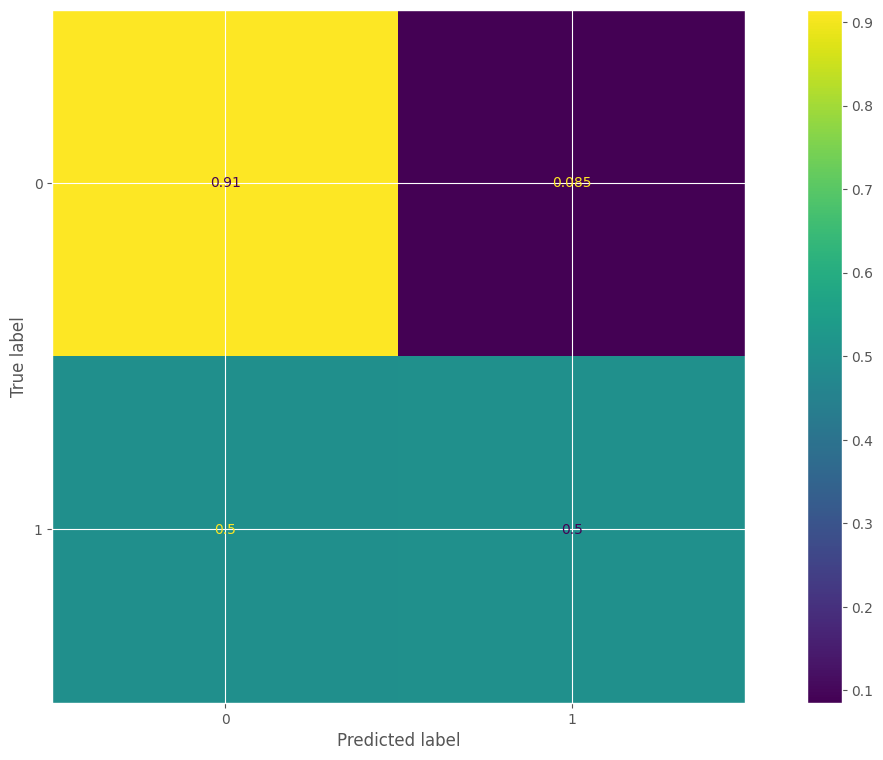

In [207]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generar la matriz de confusi√≥n normalizada con el modelo combinado RF + LightGBM
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_ensemble, normalize="true")

Para la clase 0 el 91% de las predicciones son correctas. No morosos clasificados como no morosos correctamente.  
el 8,5% fueron falsos positivos: no morosos predichos como morosos  
Para la clase 1 el 50% fueron falsos negativos (el modelo dijo moroso cuando no lo era) y el 50% fueron predicciones correctas (morosos clasificados como morosos).  
Si yo fuera negocio dir√≠a que hay que buscar algo mejor sin duda.  
Podr√≠amos usar XGBoost o CatBoost que pueden mejorar el recall o refinar el class_weight y dar m√°s peso a los morosos.